# SHapley Additive exPlanations

In [2]:
# import libraries
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

from utils import load_process_split_dataset

import matplotlib.pyplot as plt
import numpy as np

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
# setting up variables
SEED = 2021
STROKE_PATH = "data/stroke.csv"

## Load Dataset & Training Random Forest

In [4]:
X_train, X_test, y_train, y_test = load_process_split_dataset(STROKE_PATH, SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4088, 21) (4088,)
(1022, 21) (1022,)


In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5226358148893361
Accuracy 0.949119373776908


## Explanation

In [6]:
explainer = shap.TreeExplainer(rf)
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [9]:
len(shap_values)

2

In [7]:
# shap values are a list of shape (num_classes, 1, num_features)
print(shap_values[0].shape)
shap_values

(1, 21)


[array([[-1.86023475e-04, -5.37170834e-04, -2.88640746e-07,
         -9.92704469e-04, -6.94936514e-04, -1.97044882e-04,
         -1.57602399e-05, -9.38211580e-05,  1.48209523e-03,
         -3.12364249e-04,  4.84485738e-04,  6.48200135e-04,
         -7.11214515e-04,  2.86689820e-03,  1.75846932e-03,
          5.08100738e-04,  2.42885191e-02,  1.89487296e-03,
          2.48217290e-03,  1.13229553e-02,  4.46590969e-03]]),
 array([[ 1.86023475e-04,  5.37170834e-04,  2.88640746e-07,
          9.92704469e-04,  6.94936514e-04,  1.97044882e-04,
          1.57602399e-05,  9.38211580e-05, -1.48209523e-03,
          3.12364249e-04, -4.84485738e-04, -6.48200135e-04,
          7.11214515e-04, -2.86689820e-03, -1.75846932e-03,
         -5.08100738e-04, -2.42885191e-02, -1.89487296e-03,
         -2.48217290e-03, -1.13229553e-02, -4.46590969e-03]])]

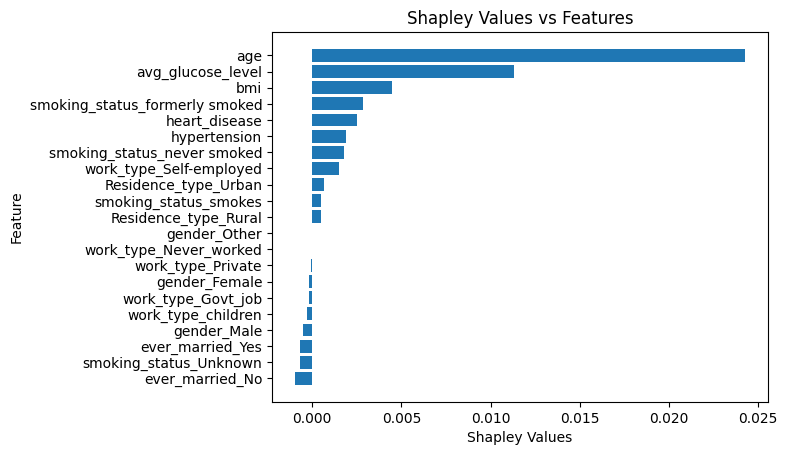

In [28]:
x = [X_test.columns[j] for j in np.argsort(shap_values[0])][0]
y = np.sort(shap_values[0].reshape(-1))
plt.barh(x, y)
 
plt.xlabel("Shapley Values")
plt.ylabel("Feature")

plt.title("Shapley Values vs Features")
plt.show()